In [44]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import random

In [45]:
data=pd.read_csv("classification_data9.csv")


In [46]:
b = np.array(data['x_2'])
a = np.array(data['x_1'])
y=np.array(data['y'])

x= np.zeros((len(y),2))

y_origin=np.zeros(len(y))
for i in range(len(y)):
       y_origin[i]=y[i]

for i in range (len(y)):  
    x [i][0]= a[i]
    x[i][1] = b[i]

In [47]:
def noise(y):
    for i in range(len(y)):
        y[i]=y_origin[i]
    d = (len(x)*7)//100
    for j in range(d):
        r = random.randint(0, len(y))
        if (y[r]==0):
            y[r] = 1 
    return y

In [48]:
y=noise(y)

IndexError: index 300 is out of bounds for axis 0 with size 300

In [50]:
def split(x,y):
    n =(len(y)*2)//3
    trainx = np.zeros((n,2))
    #trainx2 = np.zeros(len(y)-n)
    trainy = np.zeros(n)
    testx = np.zeros((len(y)-n,2))
    #testx2 = np.zeros(n)
    testy = np.zeros(len(y)-n)
    indtrain =0
    indtest =0
    for a in range(len(y)):
        if (a % 3 !=0 ):
            trainx[indtrain][0]=x[a][0]
            trainx[indtrain][1]=x[a][1]
            
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest][0]=x[a][0]
            testx[indtest][1]=x[a][1]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx,  testy

In [51]:
def normalize(x):
    X= np.zeros((len(x),2))
    for i in range (len(x)):
        X[i][0]= (x[i][0] - np.mean(column(x, 0)))/ sqrt((np.var(column(x, 0))))
        X[i][1]= (x[i][1] - np.mean(column(x, 1)))/ sqrt((np.var(column(x, 1))))
    return X

In [52]:
trainx,trainy ,testx,  testy = split(x,y)


In [53]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [54]:
def recupere(x):
  y=np.zeros(len(x))
  for i in range(len(x)):
    s=1/(1+exp(-x[i]))
    if s>0.5:
      y[i]=1
    else:
      y[i]=0
  return y

In [55]:
def h( x1 , x2, theta ):
  return theta[0]+theta[1]*x1+theta[2]*x2

In [56]:
def calculate_prediction(x, theta ):
  prediction = np.zeros(len(x))
  for i in range(0,len(x)):
    prediction[i]= h(x[i][0],x[i][1],theta)
  return prediction


In [57]:
def logisticregression(x,y):
    lamb=0.7
    pas=0.01
    theta=np.zeros(3)
    s=np.ones(3)
    nor=np.linalg.norm(s)
    while(nor>0.01):
        p=-calculate_prediction(x,theta)
        pred  = 1/(1+ exp(p));
        err = pred-y;
        s[0]=(sum(err)+lamb*theta[0])/len(x)
        s[1]=(np.dot(err,column(x, 0))+lamb*theta[1])/len(x);
        s[2]=(np.dot(err,column(x, 1))+lamb*theta[2])/len(x);
        theta=theta-pas*s
        nor=np.linalg.norm(s)
    return theta

In [58]:
def logisticregression_without(x,y):
    pas=0.1
    theta=np.zeros(3)
    s=np.ones(3)
    nor=np.linalg.norm(s)
    while(nor>0.01):
        p=-calculate_prediction(x,theta)
        pred  = 1/(1+ exp(p));
        err = pred-y;
        s[0]=(sum(err))/len(x)
        s[1]=(np.dot(err,column(x, 0)))/len(x);
        s[2]=(np.dot(err,column(x, 1)))/len(x);
        theta=theta-pas*s
        nor=np.linalg.norm(s)
    return theta

In [59]:
l=logisticregression(normalize(trainx),trainy)

In [60]:
l2=logisticregression_without(normalize(trainx),trainy)

In [61]:
def new_y(x,w):
  y=np.zeros(len(x))
  for i in range(len(x)):
    s=1/(1+exp(w[0] -w[1]*x[i]))
    if s>0.5:
      y[i]=1
     
    else:
      y[i]=0
      
  return y

In [62]:
def ls(x,y,w):
    s=0
    h=1/(1-exp(-calculate_prediction(x,w)))
    for i in range(len(x)):
        if(h[i]>=0.5):
            h[i]=1
        else:
            h[i]=0
        if(h[i]!=y[i]):
            s=s+1
    return s/len(x)

In [63]:
ls(normalize(testx),testy,l)


0.03

In [65]:
ls(normalize(testx),testy,l2)

0.03

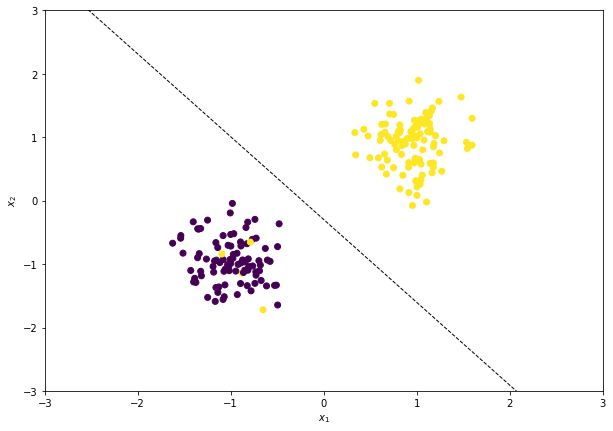

In [66]:
c = -(l[0])/l[2]
m =  -(l[1])/l[2]

fig = plt.figure(2, figsize=(10, 7))
# Plot the data and the classification with the decision boundary.
xmin, xmax = -3, 3
ymin, ymax = -3, 3
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')


col = {1 :"black", -1:"green"}
norr=normalize(trainx)
plt.scatter(column(norr,0), column(norr,1) ,c = trainy)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [70]:
def costfunc(h, y, theta, lam):
    theta = theta[1:,:]
    m = h.shape[0]
    y1 = y.transpose()
    h1 = np.log(h)
    p1 = np.dot(y1,h1)
    h2 = np.log(1-h)
    p2 = np.dot((1- y).transpose(), h2)
    p3 = sum(lam*(theta**2))/(2*m)
    ans = -(p1 +p2)/m + (p3)
    return ans